wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: amirjoudaki. Use `wandb login --relogin` to force relogin


Using device: cuda
Preparing CIFAR10 data for continual learning...
Files already downloaded and verified
Files already downloaded and verified
Creating MLP model...

Model Architecture:
layers: ModuleDict
layers.linear_0: Linear
layers.norm_0: BatchNorm1d
layers.act_0: ReLU
layers.linear_1: Linear
layers.norm_1: BatchNorm1d
layers.act_1: ReLU
layers.linear_2: Linear
layers.norm_2: BatchNorm1d
layers.act_2: ReLU
layers.out: Linear

Starting continual learning experiment...
Starting continual learning with 3 tasks...

Starting Task 0: Classes [0, 1]
Measuring initial metrics...
Initial performance on CURRENT classes:
  Train Loss: 2.2638, Train Acc: 34.26%
  Val Loss: 2.2645, Val Acc: 33.45%
Task 0, Epoch 1/10:
  CURRENT: Train Loss: 0.5212, Train Acc: 81.50%, Val Loss: 0.3627, Val Acc: 84.50%
  Time: 0.95s
Task 0, Epoch 2/10:
  CURRENT: Train Loss: 0.3215, Train Acc: 86.11%, Val Loss: 0.3466, Val Acc: 84.50%
  Time: 1.95s
Task 0, Epoch 3/10:
  CURRENT: Train Loss: 0.2693, Train Acc: 88

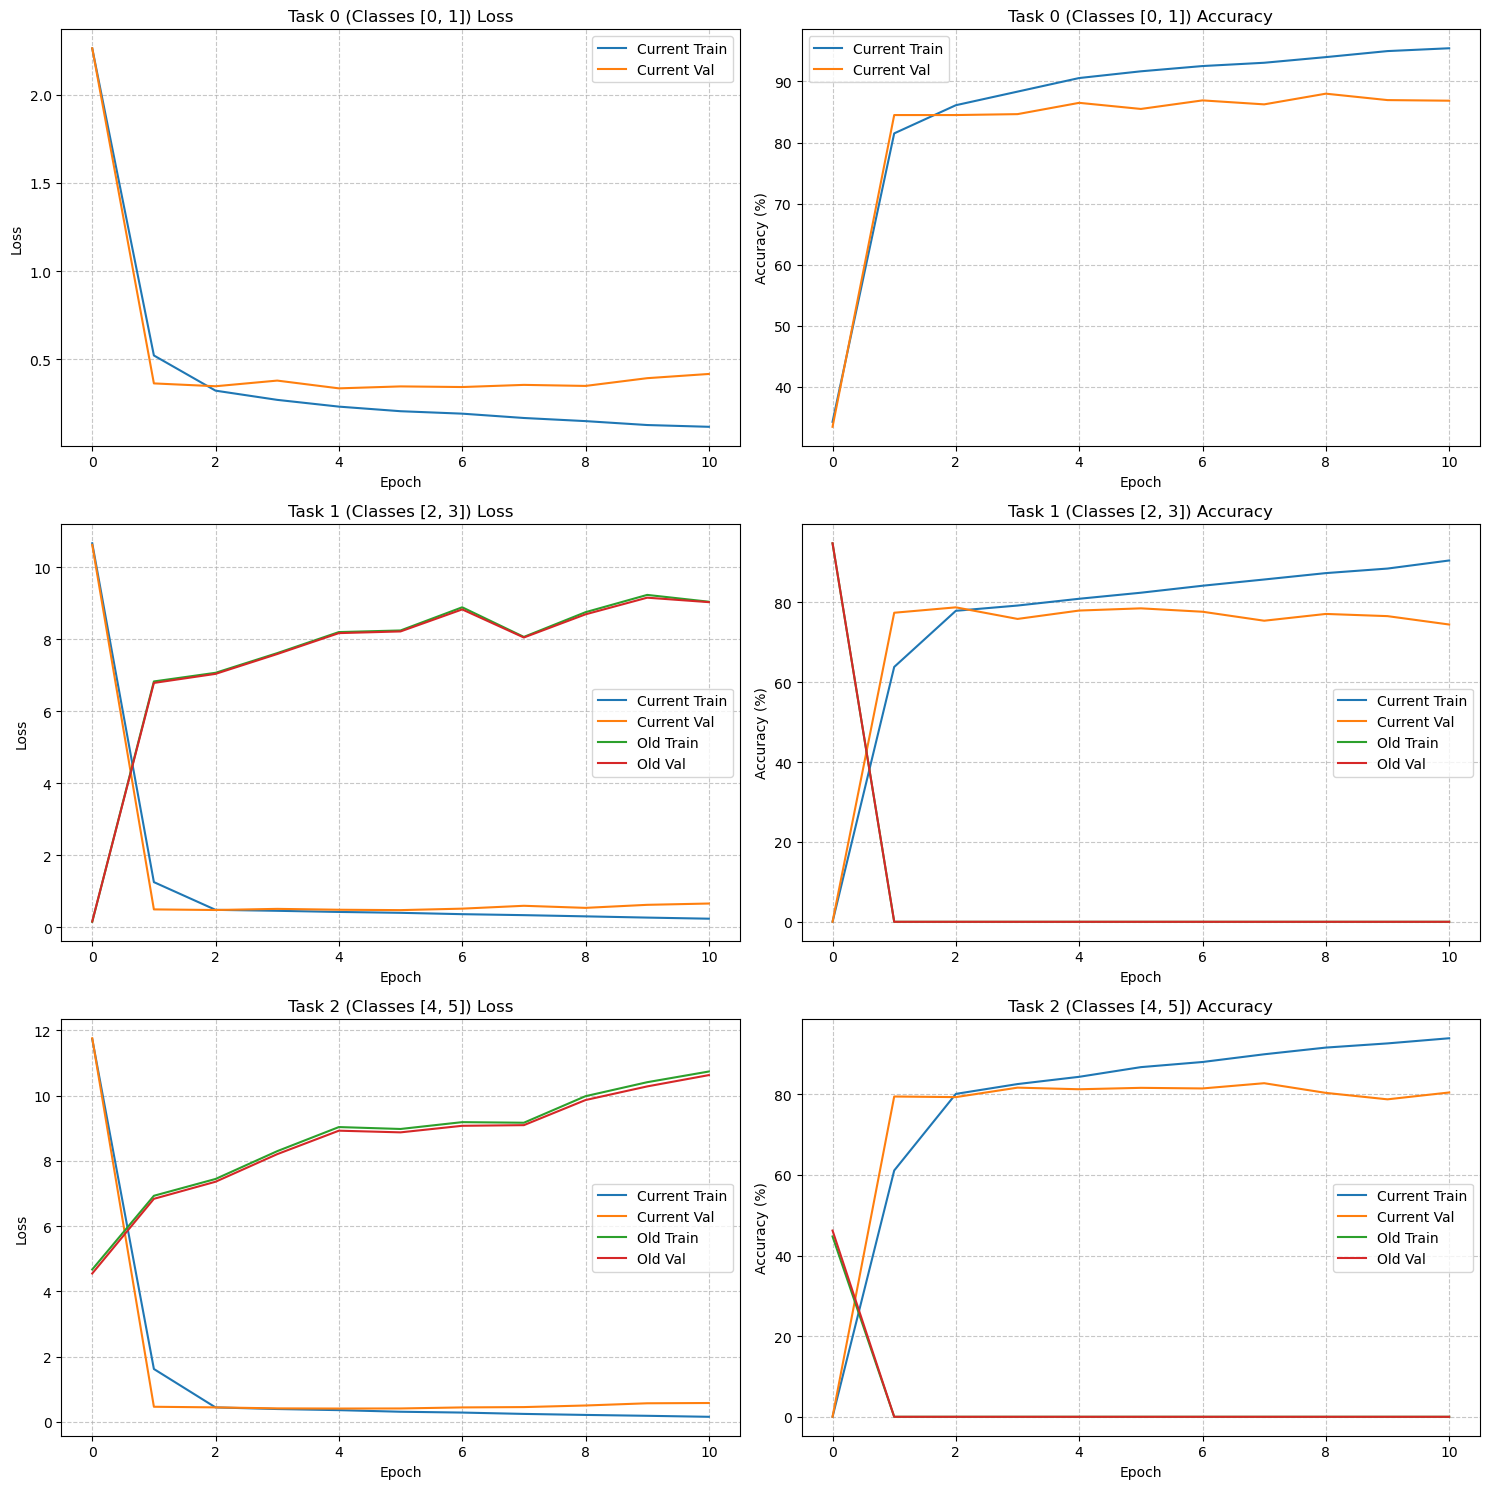

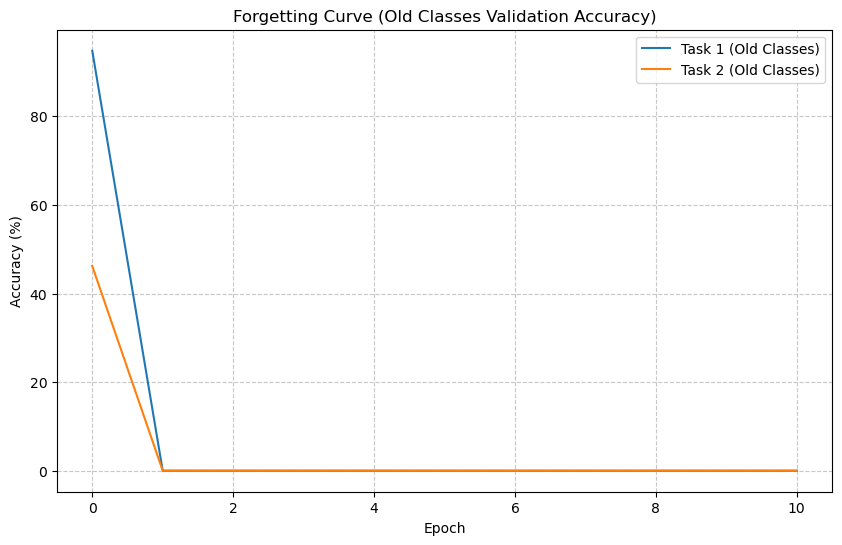

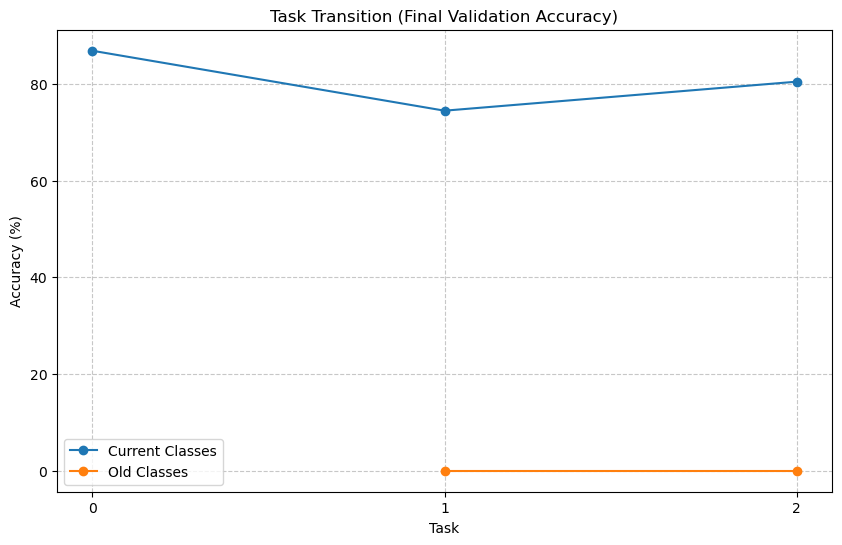


Experiment completed!


In [1]:

# Import the necessary classes from the provided code
# MLP, CNN, ResNet, VisionTransformer, NetworkMonitor, etc. would be imported here
from continual_learning  import * 

###########################################
# Main Function
###########################################

if __name__ == "__main__":
    # Set random seed for reproducibility
    set_seed(42)
    
    # Configuration
    config = {
        "model_config": {
            "input_size": 3 * 32 * 32,
            "hidden_sizes": [128]*5,
            "output_size": 10,  # Total number of classes in CIFAR10
            "activation": "relu",
            "dropout_p": 0.0,
            "normalization": "batch",
            "norm_after_activation": False,
            
        },
        "model_type": "MLP",  # Options: "MLP", "CNN", "VisionTransformer",
        "learning_rate": 0.001,
        "batch_size": 64,
        "epochs_per_task": 10,
        "metrics_frequency": 2,
        "dead_threshold": 0.95, 
        "corr_threshold": 0.99, 
        "saturation_threshold": 1e-4, 
        "saturation_percentage": 0.99,
        "class_sequence": [
            [0, 1, 2, 3, 4],  
            [5, 6, 7, 8, 9] # Task 3: frog, horse, ship, truck
        ]
    }
    
    # Initialize wandb
    wandb.init(project="CL-plasticity",   tags=["continual-task"], config=config)
    
    # Set device
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    print(f"Using device: {device}")
    
    # Load data for continual learning
    print("Preparing CIFAR10 data for continual learning...")
    train_dataloaders, test_dataloaders = get_cifar10_continual_data(
        config["class_sequence"], 
        batch_size=config["batch_size"]
    )
    
    # Create model
    print(f"Creating {config['model_type']} model...")
    if config["model_type"] == "MLP":
        model = MLP(**config["model_config"])
    # Other model types can be added here
    
    model = model.to(device)
    
    # Print model architecture
    print("\nModel Architecture:")
    for name, module in model.named_modules():
        if len(name) > 0:
            print(f"{name}: {module.__class__.__name__}")
    
    # Run continual learning
    print("\nStarting continual learning experiment...")
    history = train_continual_learning(model, train_dataloaders, config, device)
    
    # Plot results
    results_dir = './results'
    os.makedirs(results_dir, exist_ok=True)
    
    print("\nPlotting results...")
    plot_continual_learning_curves(history, save_path=results_dir)
    plot_forgetting_curve(history, save_path=results_dir)
    plot_task_transition(history, save_path=results_dir)
    
    # Save results
    print("\nExperiment completed!")